## Problem Statement


#### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

### Hierarchical Clustering

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)


import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')


In [2]:
airlines=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
airlines=airlines.rename({'Award?':'Award','ID#':'ID'},axis=1)

In [5]:
airlines.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


As we can see data parameters are all over the place.Hence first we need to normalise the data.

In [6]:
# Normalising function

def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [7]:
df_norm=norm(airlines.iloc[:,1:]) # only numerical part is considered for normalising.

In [8]:
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


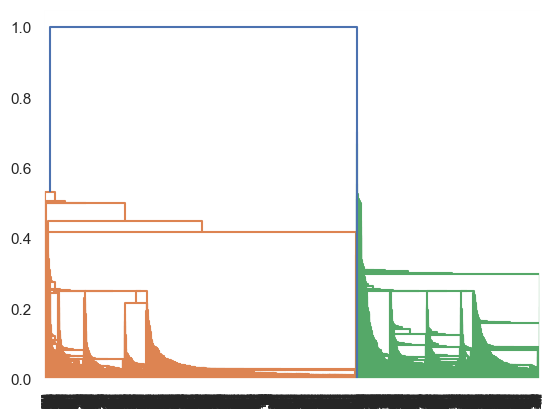

In [9]:
# Create dendogram
dendogram=sch.dendrogram(sch.linkage(df_norm,method='single'))

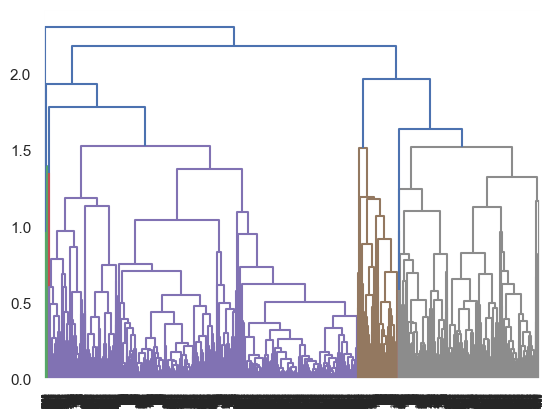

In [10]:
dendogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [11]:
?? AgglomerativeClustering

In [12]:
hc=AgglomerativeClustering(n_clusters=5,linkage='single',affinity='euclidean')

In [13]:
y_hc=hc.fit_predict(df_norm)

In [14]:
airlines['h_clusterid']=y_hc

In [15]:
airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [16]:
airlines.groupby(["h_clusterid"])['ID'].apply(lambda x:tuple(x))

h_clusterid
0    (1, 2, 3, 4, 6, 7, 11, 13, 14, 15, 23, 24, 25,...
1    (5, 8, 9, 10, 12, 16, 17, 18, 19, 20, 21, 22, ...
2                                              (3606,)
3                                              (2862,)
4                                               (915,)
Name: ID, dtype: object

In [17]:
airlines[airlines["ID"].isin([5, 8, 9, 10, 12, 16])]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,1


### KMeans Clustering

In [18]:
model=KMeans(n_clusters=5)
airlines1=model.fit(df_norm)

In [19]:
model.labels_

array([4, 4, 4, ..., 2, 3, 3])

In [20]:
md=pd.Series(model.labels_)

In [21]:
airlines["labels"]=md

In [22]:
airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2


In [23]:
airlines.groupby(["labels"])["ID"].apply(lambda x:tuple(x))

labels
0    (8, 18, 22, 30, 37, 40, 43, 46, 48, 54, 58, 83...
1    (7, 31, 33, 45, 57, 59, 61, 68, 73, 74, 76, 78...
2    (5, 9, 10, 12, 16, 17, 19, 20, 21, 29, 36, 39,...
3    (1141, 1445, 1564, 1567, 1568, 1569, 1586, 196...
4    (1, 2, 3, 4, 6, 11, 13, 14, 15, 23, 24, 25, 26...
Name: ID, dtype: object

In [24]:
model.cluster_centers_

array([[ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -4.44089210e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
         7.17842978e-02,  6.90692719e-03,  1.13902296e-02,
         2.39980966e-01,  3.94129174e-15],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
  

In [25]:
airlines.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award', 'h_clusterid', 'labels'],
      dtype='object')

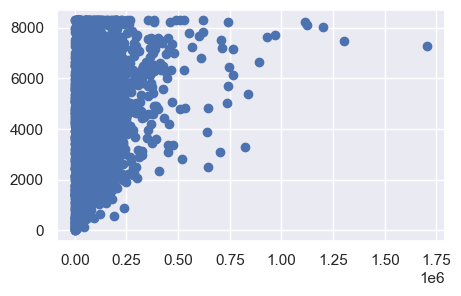

In [26]:
plt.figure(figsize=(5,3))
plt.scatter(airlines["Balance"],airlines["Days_since_enroll"],cmap=plt.cm.Accent)

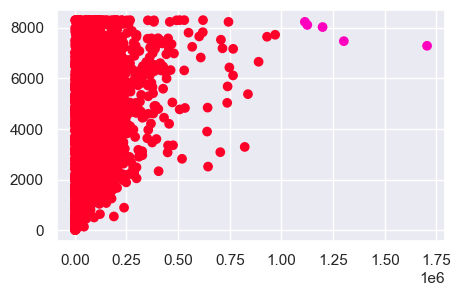

In [27]:
# Hierarchical
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage = "complete")
plt.figure(figsize=(5,3))
plt.scatter(airlines["Balance"],airlines["Days_since_enroll"],c=cluster.fit_predict(airlines.iloc[:,[1,-4]]),cmap=plt.cm.gist_rainbow)

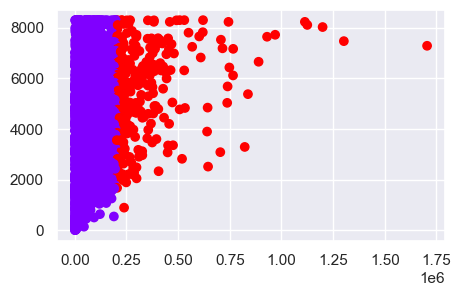

In [28]:
# kMeans
model = KMeans(n_clusters = 2, max_iter=600, algorithm = 'auto')
model.fit(airlines.iloc[:,[1,-4]])
plt.figure(figsize=(5,3))
plt.scatter(airlines["Balance"],airlines["Days_since_enroll"],c=model.labels_,cmap=plt.cm.rainbow)

### DBSCAN

In [29]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

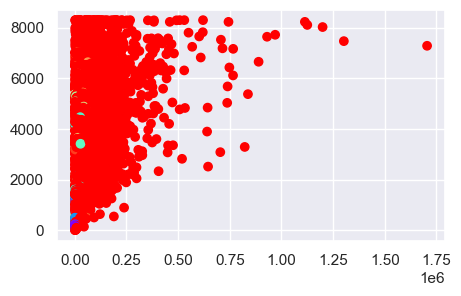

In [30]:

dbs=DBSCAN(min_samples=2,eps=0.2)
class_pr=dbs.fit_predict(airlines.iloc[:,1:5])
plt.figure(figsize=(5,3))
plt.scatter(airlines["Balance"],airlines["Days_since_enroll"],c=class_pr,cmap=plt.cm.rainbow_r)

In [31]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [32]:
nc = [1,2,3,4,5,6,7,8,9]
iner = []
for i  in nc:
    km=KMeans(i)
    km.fit(df.iloc[:,[1,-2]])
    iner.append(km.inertia_)

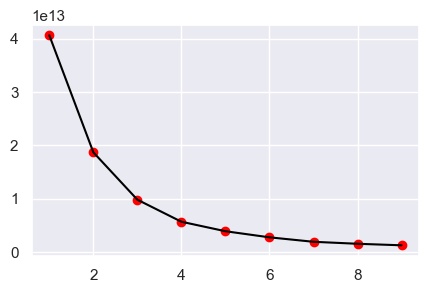

In [33]:
plt.figure(figsize=(5,3))
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

### Silhouette Score

In [34]:
from sklearn.metrics import silhouette_score as sil

In [35]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc.fit_predict(df.iloc[:,[1,-2]])
    sc_score.append(sil(df.iloc[:,[1,-2]],y))

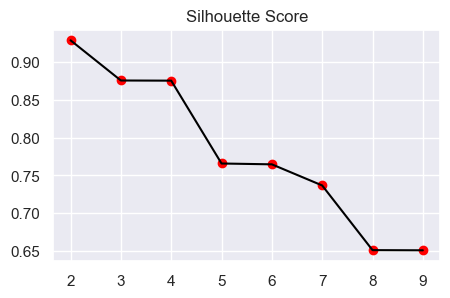

In [36]:
plt.figure(figsize=(5,3))
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.title("Silhouette Score")
plt.show()